# Activity 1.2 : Training Neural Networks
Submitted By: Labbao, Benedick D.<br>
Performed On: 01/30/2024<br>
Submitted On: 01/30/2024

Submitted To: Engr. Roman M. Richard

---

#### Objective(s):

This activity aims to demonstrate how to train neural networks using keras

#### Intended Learning Outcomes (ILOs):
* Demonstrate how to build and train neural networks
* Demonstrate how to evaluate and plot the model using training and validation loss


#### Resources:
* Jupyter Notebook

CI Pima Diabetes Dataset

* pima-indians-diabetes.csv


#### Procedures

Load the necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_auc_score, roc_curve, accuracy_score
from sklearn.ensemble import RandomForestClassifier

import seaborn as sns

%matplotlib inline

In [ ]:
## Import Keras objects for Deep Learning

from keras.models  import Sequential
from keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
from keras.optimizers import Adam, SGD, RMSprop

Load the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
filepath = "/content/drive/MyDrive/3RD YR. - 2ND SEM./CPE 313/pima-indians-diabetes.csv"
names = ["times_pregnant", "glucose_tolerance_test", "blood_pressure", "skin_thickness", "insulin",
         "bmi", "pedigree_function", "age", "has_diabetes"]
diabetes_df = pd.read_csv(filepath, names=names)

Check the top 5 samples of the data

In [ ]:
print(diabetes_df.shape)
diabetes_df.head(5)

(768, 9)


,times_pregnant,glucose_tolerance_test,blood_pressure,skin_thickness,insulin,bmi,pedigree_function,age,has_diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
diabetes_df.dtypes

times_pregnant              int64
glucose_tolerance_test      int64
blood_pressure              int64
skin_thickness              int64
insulin                     int64
bmi                       float64
pedigree_function         float64
age                         int64
has_diabetes                int64
dtype: object

In [ ]:
X = diabetes_df.iloc[:, :-1].values
y = diabetes_df["has_diabetes"].values

Split the data to Train, and Test (75%, 25%)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=11111)

In [ ]:
np.mean(y), np.mean(1-y)

(0.3489583333333333, 0.6510416666666666)

Build a single hidden layer neural network using 12 nodes.
Use the sequential model with single layer network and input shape to 8.



Normalize the data

In [ ]:
normalizer = StandardScaler()
X_train_norm = normalizer.fit_transform(X_train)
X_test_norm = normalizer.transform(X_test)

Define the model:
* Input size is 8-dimensional
* 1 hidden layer, 12 hidden nodes, sigmoid activation
* Final layer with one node and sigmoid activation (standard for binary classification)

In [ ]:
model  = Sequential([
    Dense(12, input_shape=(8,), activation="sigmoid"),
    Dense(1, activation="sigmoid")
])

View the model summary

In [ ]:
model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_52 (Dense)            (None, 12)                108       
                                                                 
 dense_53 (Dense)            (None, 1)                 13        
                                                                 
Total params: 121 (484.00 Byte)
Trainable params: 121 (484.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Train the model
* Compile the model with optimizer, loss function and metrics
* Use the fit function to return the run history.


In [ ]:
model.compile(SGD(lr = .003), "binary_crossentropy", metrics=["accuracy"])
run_hist_1 = model.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=200)

Epoch 1/200
18/18 [==============================] - 1s 12ms/step - loss: 0.6679 - accuracy: 0.6528 - val_loss: 0.6728 - val_accuracy: 0.6406
Epoch 2/200
18/18 [==============================] - 0s 4ms/step - loss: 0.6648 - accuracy: 0.6528 - val_loss: 0.6695 - val_accuracy: 0.6406
Epoch 3/200
18/18 [==============================] - 0s 5ms/step - loss: 0.6619 - accuracy: 0.6545 - val_loss: 0.6663 - val_accuracy: 0.6406
Epoch 4/200
18/18 [==============================] - 0s 4ms/step - loss: 0.6590 - accuracy: 0.6528 - val_loss: 0.6633 - val_accuracy: 0.6406
Epoch 5/200
18/18 [==============================] - 0s 3ms/step - loss: 0.6563 - accuracy: 0.6545 - val_loss: 0.6603 - val_accuracy: 0.6406
Epoch 6/200
18/18 [==============================] - 0s 4ms/step - loss: 0.6536 - accuracy: 0.6545 - val_loss: 0.6575 - val_accuracy: 0.6406
Epoch 7/200
18/18 [==============================] - 0s 4ms/step - loss: 0.6510 - accuracy: 0.6545 - val_loss: 0.6547 - val_accuracy: 0.6406
Epoch 8/200


In [ ]:
## Like we did for the Random Forest, we generate two kinds of predictions
#  One is a hard decision, the other is a probabilitistic score.

y_pred_class_nn_1 = (model.predict(X_test_norm) > 0.5).astype('int32')
y_pred_prob_nn_1 = model.predict(X_test_norm)

6/6 [==============================] - 0s 4ms/step


In [ ]:
# Let's check out the outputs to get a feel for how keras apis work.
y_pred_class_nn_1[:10]

array([[0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0]], dtype=int32)

In [ ]:
y_pred_prob_nn_1[:10]

array([[0.4386082 ],
       [0.6353947 ],
       [0.28810927],
       [0.26070604],
       [0.1897468 ],
       [0.5144303 ],
       [0.09078855],
       [0.28181428],
       [0.81833285],
       [0.23687294]], dtype=float32)

Create the plot_roc function

In [ ]:
def plot_roc(y_test, y_pred, model_name):
    fpr, tpr, thr = roc_curve(y_test, y_pred)
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.plot(fpr, tpr, 'k-')
    ax.plot([0, 1], [0, 1], 'k--', linewidth=.5)  # roc curve for random model
    ax.grid(True)
    ax.set(title='ROC Curve for {} on PIMA diabetes problem'.format(model_name),
           xlim=[-0.01, 1.01], ylim=[-0.01, 1.01])

Evaluate the model performance and plot the ROC CURVE

accuracy is 0.750
roc-auc is 0.825


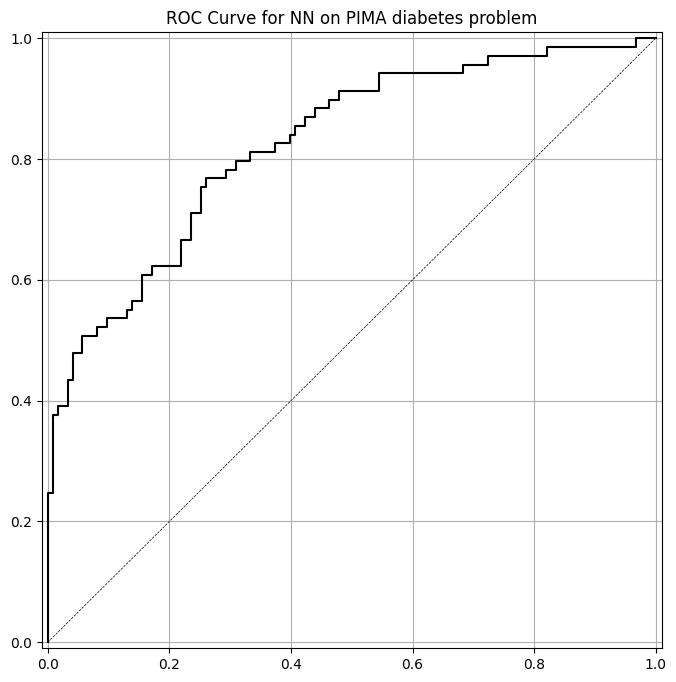

In [ ]:
print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_nn_1)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_nn_1)))

plot_roc(y_test, y_pred_prob_nn_1, 'NN')

 Plot the training loss and the validation loss over the different epochs and see how it looks

In [ ]:
run_hist_1.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

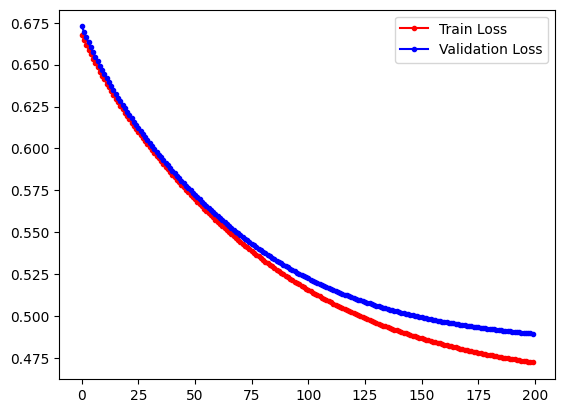

In [ ]:
fig, ax = plt.subplots()
ax.plot(run_hist_1.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(run_hist_1.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()

What is your interpretation about the result of the train and validation loss?

The train loss and validation loss graph above showed that both the train loss and validation loss were decreasing over epoch, this means that the model is improving over time.

#### Supplementary Activity

* Build a model with two hidden layers, each with 6 nodes
* Use the "relu" activation function for the hidden layers, and "sigmoid" for the final layer
* Use a learning rate of .003 and train for 1500 epochs
* Graph the trajectory of the loss functions, accuracy on both train and test set
* Plot the roc curve for the predictions
* Use different learning rates, numbers of epochs, and network structures.
* Plot the results of training and validation loss using different learning rates, number of epocgs and network structures
* Interpret your result

Dataset Used: https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset/

In [ ]:
# Heart Attack Analysis Dataset

filepath = "/content/drive/MyDrive/3RD YR. - 2ND SEM./CPE 313/dataset/heart.csv"
heart_attack_df = pd.read_csv(filepath)

In [ ]:
heart_attack_df.head(10)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [ ]:
heart_attack_df.tail(10)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
293,67,1,2,152,212,0,0,150,0,0.8,1,0,3,0
294,44,1,0,120,169,0,1,144,1,2.8,0,0,1,0
295,63,1,0,140,187,0,0,144,1,4.0,2,2,3,0
296,63,0,0,124,197,0,1,136,1,0.0,1,0,2,0
297,59,1,0,164,176,1,0,90,0,1.0,1,2,1,0
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [ ]:
X = heart_attack_df.iloc[:, :-1].values
y = heart_attack_df["output"].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=55555)

In [ ]:
normalizer = StandardScaler()
X_train_norm = normalizer.fit_transform(X_train)
X_test_norm = normalizer.transform(X_test)

## Model 1
2 Hidden layers with 6 nodes uses RELU function

1 Output layers with 1 nodes uses sigmoid function

Epoch = 500

In [ ]:
# Created 3 dense layers

my_model = Sequential([
    Dense(units=6, input_shape=(13,), activation='relu'),
    Dense(units=6, activation='relu'),
    Dense(units=1, activation='sigmoid')
    ])

my_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 6)                 84        
                                                                 
 dense_7 (Dense)             (None, 6)                 42        
                                                                 
 dense_8 (Dense)             (None, 1)                 7         
                                                                 
Total params: 133 (532.00 Byte)
Trainable params: 133 (532.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
my_model.compile(SGD(lr = .003), "binary_crossentropy", metrics=["accuracy"])
run_hist_1 = my_model.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=500)

Epoch 1/500
7/7 [==============================] - 1s 50ms/step - loss: 0.8318 - accuracy: 0.5708 - val_loss: 0.7579 - val_accuracy: 0.5495
Epoch 2/500
7/7 [==============================] - 0s 12ms/step - loss: 0.7937 - accuracy: 0.5519 - val_loss: 0.7286 - val_accuracy: 0.5495
Epoch 3/500
7/7 [==============================] - 0s 9ms/step - loss: 0.7618 - accuracy: 0.5566 - val_loss: 0.7049 - val_accuracy: 0.5714
Epoch 4/500
7/7 [==============================] - 0s 10ms/step - loss: 0.7364 - accuracy: 0.5708 - val_loss: 0.6858 - val_accuracy: 0.5824
Epoch 5/500
7/7 [==============================] - 0s 13ms/step - loss: 0.7152 - accuracy: 0.5896 - val_loss: 0.6693 - val_accuracy: 0.5714
Epoch 6/500
7/7 [==============================] - 0s 9ms/step - loss: 0.6969 - accuracy: 0.6085 - val_loss: 0.6554 - val_accuracy: 0.5714
Epoch 7/500
7/7 [==============================] - 0s 12ms/step - loss: 0.6809 - accuracy: 0.6132 - val_loss: 0.6434 - val_accuracy: 0.5934
Epoch 8/500
7/7 [=====

In [ ]:
y_pred_class_nn_1 = (my_model.predict(X_test_norm) > 0.5).astype('int32')
y_pred_prob_nn_1 = my_model.predict(X_test_norm)

3/3 [==============================] - 0s 4ms/step


accuracy is 0.813
roc-auc is 0.840


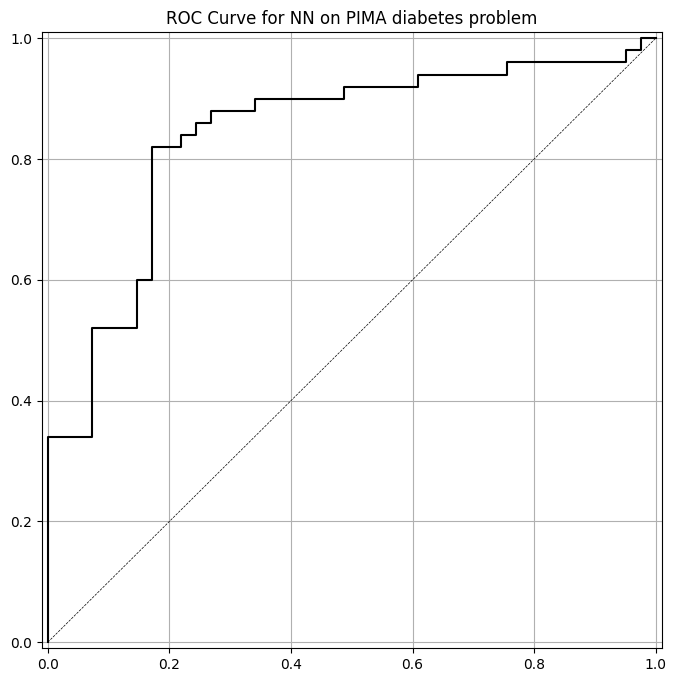

In [ ]:
print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_nn_1)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_nn_1)))

plot_roc(y_test, y_pred_prob_nn_1, 'NN')

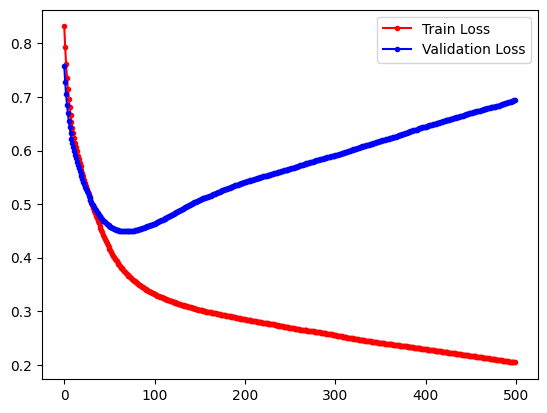

In [ ]:
fig, ax = plt.subplots()
ax.plot(run_hist_1.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(run_hist_1.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()

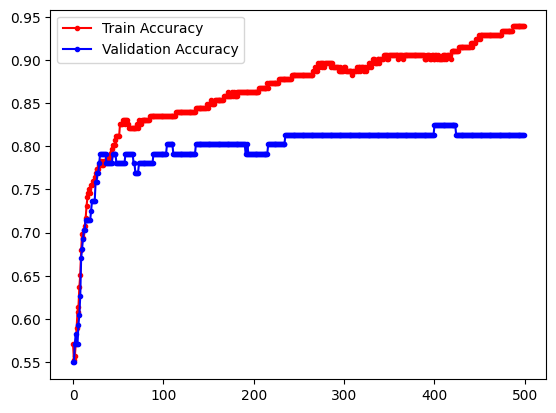

In [ ]:
fig, ax = plt.subplots()
ax.plot(run_hist_1.history["accuracy"],'r', marker='.', label="Train Accuracy")
ax.plot(run_hist_1.history["val_accuracy"],'b', marker='.', label="Validation Accuracy")
ax.legend()

### Model 2

1 Hidden layers with 6 nodes uses RELU function

1 Hidden layers with 6 nodes uses sigmoid function

1 Output layers with 1 nodes uses sigmoid function

Epoch = 500

In [ ]:
my_model = Sequential([
    Dense(units=6, input_shape=(13,), activation='relu'),
    Dense(units=6, activation='sigmoid'),
    Dense(units=1, activation='sigmoid')
    ])

my_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 6)                 84        
                                                                 
 dense_19 (Dense)            (None, 6)                 42        
                                                                 
 dense_20 (Dense)            (None, 1)                 7         
                                                                 
Total params: 133 (532.00 Byte)
Trainable params: 133 (532.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
my_model.compile(SGD(lr = .003), "binary_crossentropy", metrics=["accuracy"])
run_hist_1 = my_model.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=1000)

Epoch 1/1000
7/7 [==============================] - 1s 41ms/step - loss: 0.7095 - accuracy: 0.5425 - val_loss: 0.7142 - val_accuracy: 0.5495
Epoch 2/1000
7/7 [==============================] - 0s 11ms/step - loss: 0.7054 - accuracy: 0.5425 - val_loss: 0.7106 - val_accuracy: 0.5495
Epoch 3/1000
7/7 [==============================] - 0s 10ms/step - loss: 0.7016 - accuracy: 0.5425 - val_loss: 0.7071 - val_accuracy: 0.5495
Epoch 4/1000
7/7 [==============================] - 0s 7ms/step - loss: 0.6979 - accuracy: 0.5425 - val_loss: 0.7039 - val_accuracy: 0.5495
Epoch 5/1000
7/7 [==============================] - 0s 9ms/step - loss: 0.6944 - accuracy: 0.5425 - val_loss: 0.7011 - val_accuracy: 0.5495
Epoch 6/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.6914 - accuracy: 0.5425 - val_loss: 0.6983 - val_accuracy: 0.5495
Epoch 7/1000
7/7 [==============================] - 0s 6ms/step - loss: 0.6883 - accuracy: 0.5425 - val_loss: 0.6957 - val_accuracy: 0.5495
Epoch 8/1000
7/7 

accuracy is 0.813
roc-auc is 0.840


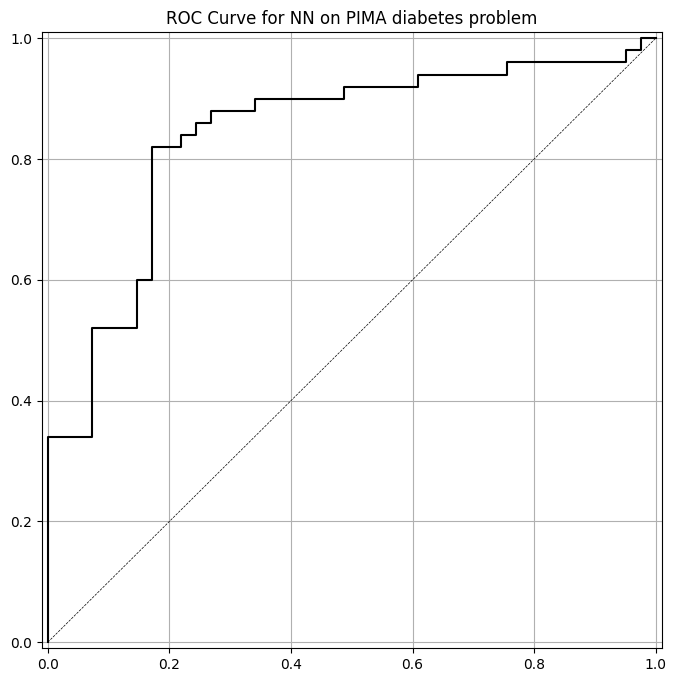

In [ ]:
print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_nn_1)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_nn_1)))

plot_roc(y_test, y_pred_prob_nn_1, 'NN')

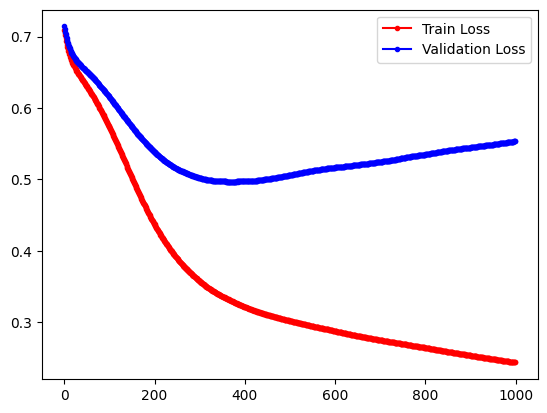

In [ ]:
fig, ax = plt.subplots()
ax.plot(run_hist_1.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(run_hist_1.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()

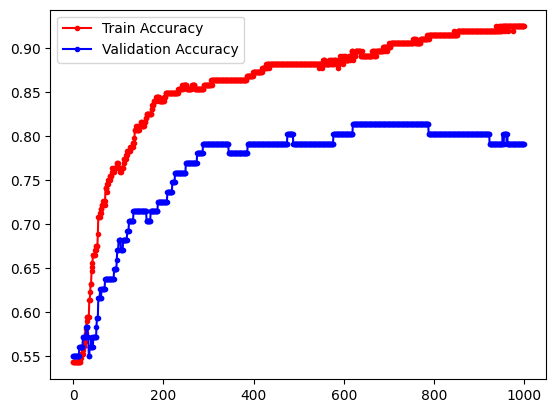

In [ ]:
fig, ax = plt.subplots()
ax.plot(run_hist_1.history["accuracy"],'r', marker='.', label="Train Accuracy")
ax.plot(run_hist_1.history["val_accuracy"],'b', marker='.', label="Validation Accuracy")
ax.legend()

### Model 3
1 Hidden layers with 6 nodes uses RELU function

1 Hidden layers with 12 nodes uses sigmoid function

1 Output layers with 1 nodes uses sigmoid function

Epoch = 1500

In [ ]:
my_model = Sequential([
    Dense(units=6, input_shape=(13,), activation='relu'),
    Dense(units=12, activation='sigmoid'),
    Dense(units=1, activation='sigmoid')
    ])

my_model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 6)                 84        
                                                                 
 dense_25 (Dense)            (None, 12)                84        
                                                                 
 dense_26 (Dense)            (None, 1)                 13        
                                                                 
Total params: 181 (724.00 Byte)
Trainable params: 181 (724.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
my_model.compile(SGD(lr = .003), "binary_crossentropy", metrics=["accuracy"])
run_hist_1 = my_model.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=1500)

Epoch 1/1500
7/7 [==============================] - 1s 36ms/step - loss: 0.7258 - accuracy: 0.4340 - val_loss: 0.7294 - val_accuracy: 0.4176
Epoch 2/1500
7/7 [==============================] - 0s 10ms/step - loss: 0.7227 - accuracy: 0.4245 - val_loss: 0.7263 - val_accuracy: 0.4066
Epoch 3/1500
7/7 [==============================] - 0s 10ms/step - loss: 0.7201 - accuracy: 0.4104 - val_loss: 0.7234 - val_accuracy: 0.4176
Epoch 4/1500
7/7 [==============================] - 0s 12ms/step - loss: 0.7172 - accuracy: 0.4009 - val_loss: 0.7208 - val_accuracy: 0.4176
Epoch 5/1500
7/7 [==============================] - 0s 11ms/step - loss: 0.7150 - accuracy: 0.3915 - val_loss: 0.7186 - val_accuracy: 0.4176
Epoch 6/1500
7/7 [==============================] - 0s 12ms/step - loss: 0.7130 - accuracy: 0.3962 - val_loss: 0.7165 - val_accuracy: 0.4396
Epoch 7/1500
7/7 [==============================] - 0s 12ms/step - loss: 0.7110 - accuracy: 0.3915 - val_loss: 0.7148 - val_accuracy: 0.4286
Epoch 8/1500


accuracy is 0.813
roc-auc is 0.840


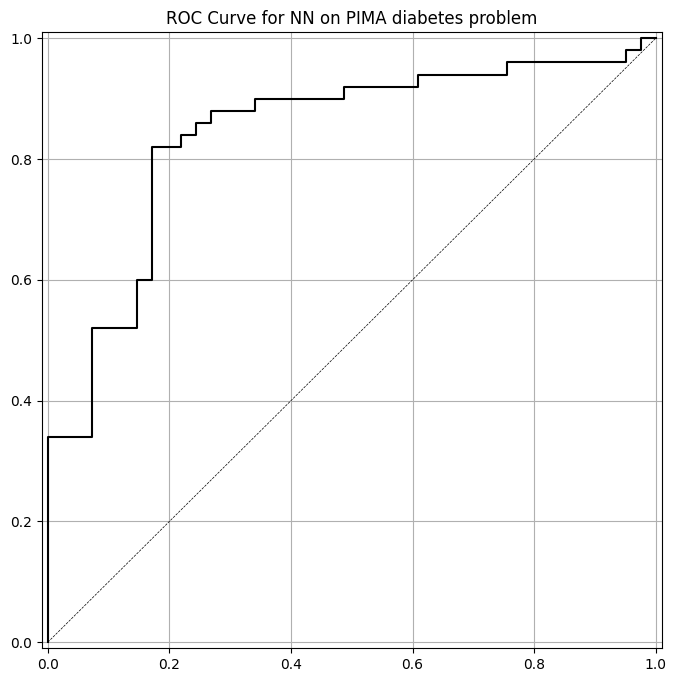

In [ ]:
print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_nn_1)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_nn_1)))

plot_roc(y_test, y_pred_prob_nn_1, 'NN')

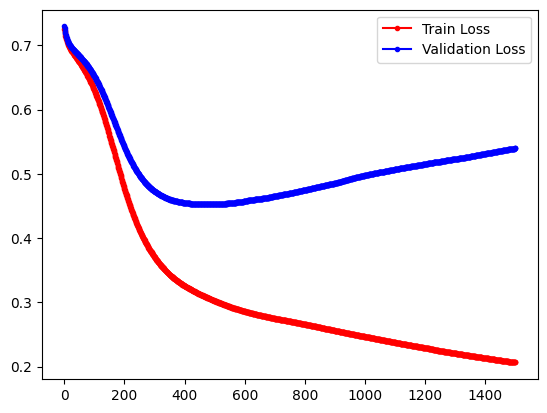

In [ ]:
fig, ax = plt.subplots()
ax.plot(run_hist_1.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(run_hist_1.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()

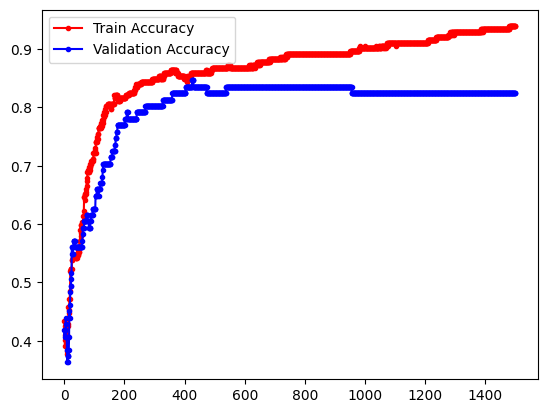

In [ ]:
fig, ax = plt.subplots()
ax.plot(run_hist_1.history["accuracy"],'r', marker='.', label="Train Accuracy")
ax.plot(run_hist_1.history["val_accuracy"],'b', marker='.', label="Validation Accuracy")
ax.legend()

#### Conclusion


In this activity, we created a neural network using Sequential model, when creating a sequential model you need to especify the layers, nodes and activation functions to use. When training compiling a model, you need the metrics and the loss function that you want the model to use, and fitting the model requires training and validation data and epoch to determine how many times you want the model to train.

### Google Colab Link

https://colab.research.google.com/drive/1QzbqS1vKFI0-XkMjoVdMDECcQSZn1de6?usp=sharing